# E-Commerce Order Cancellation Prediction

## Project Overview

This is a machine learning/data science project which predicts order cancellations in e-commerce operations.
Order cancellations pose significant challenges in e-commerce, including direct revenue impact
and potential unnecessary operational costs. It is therefore important to understand cancellation patterns,
and make accurate cancellation predictions.

# Part I – Exploratory Data Analysis 

Before building your model, you are given the dataset, and the Order Fulfilment team would like you to analyse it and raise any concerns you have about it. Perform an analysis of the data and note any changes or fixes that you make to it in preparation for building your model. 

## 1.1 Load Training Data

In [1]:
import pandas as pd

def load_GHS_data(data_path):
    
    return pd.read_csv(data_path)

In [ ]:
# load training data
GHS_data = load_GHS_data('./dataset/df_train.csv')

## 1.2 Basic Information of the Data

In [3]:
# take a quick look at the top five rows
GHS_data.head()

,id,app_or_website,customer_collects,customer_segmentation,is_a_repeat_order,lead_time,n_customer_notes,n_items_above_quantity_10,n_listed_addresses,n_listed_payment_methods,n_previous_cancelled_orders,n_previous_completed_orders,n_small_items,payment_type,slot_date,store_number,total_price,status
0,TID32798,website,0.0,group_1,0.0,12.421322,0.0,2.0,1.0,1.0,0.0,0.0,0.0,debit,2018-09-25 00:00:00,id_58,69.243353,Not_Canceled
1,TID29290,app,NaN,group_1,0.0,39.849103,0.0,0.0,1.0,2.0,0.0,0.0,2.0,credit,2018-07-22 00:00:00,id_29,59.937542,Not_Canceled
2,TID16941,website,0.0,group_1,0.0,1.608750,1.0,0.0,1.0,2.0,0.0,0.0,1.0,debit,2019-07-12 00:00:00,id_4,84.391362,Not_Canceled
3,TID02831,app,0.0,group_1,0.0,116.432876,0.0,2.0,1.0,1.0,0.0,0.0,1.0,debit,2019-02-05 00:00:00,id_19,46.689214,Not_Canceled
4,TID22422,app,NaN,group_1,0.0,71.181542,1.0,0.0,1.0,2.0,0.0,0.0,3.0,credit,2019-04-17 00:00:00,id_8,72.215528,Not_Canceled


In [4]:
# basic description of the data
GHS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4000 non-null   object 
 1   app_or_website               4000 non-null   object 
 2   customer_collects            3819 non-null   float64
 3   customer_segmentation        3982 non-null   object 
 4   is_a_repeat_order            3608 non-null   float64
 5   lead_time                    4000 non-null   float64
 6   n_customer_notes             4000 non-null   float64
 7   n_items_above_quantity_10    4000 non-null   float64
 8   n_listed_addresses           4000 non-null   float64
 9   n_listed_payment_methods     3608 non-null   float64
 10  n_previous_cancelled_orders  4000 non-null   float64
 11  n_previous_completed_orders  4000 non-null   float64
 12  n_small_items                4000 non-null   float64
 13  payment_type      

Note Two: There are 4000 samples in the dataset, each with 18 attributes.

Note Two: 7 attributes have object Dtype. The entries in these attributes may need to be converted to numbers for building our model.

Note Three: It can be seen the attributes "customer_collects", "customer_segmentation", "is_a_repeat_order", and "n_listed_payment_methods" have non-null values smaller than 4000, meaning the data can be missing.

### 1.2.1 Summary of Numerical Attributes

In [5]:
GHS_data.describe()

,customer_collects,is_a_repeat_order,lead_time,n_customer_notes,n_items_above_quantity_10,n_listed_addresses,n_listed_payment_methods,n_previous_cancelled_orders,n_previous_completed_orders,n_small_items,total_price
count,3819.000000,3608.000000,4000.000000,4000.000000,4000.000000,4000.000000,3608.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.039801,0.010809,61.101498,0.650250,0.773500,1.101000,1.870011,0.031500,0.194000,2.132000,57.457964
std,0.195517,0.103419,62.658754,0.787134,0.860455,0.378596,0.523375,0.366799,1.709414,1.313966,18.379476
min,0.000000,0.000000,-99.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.871934,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,46.954576
50%,0.000000,0.000000,41.875265,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,56.608884
75%,0.000000,0.000000,93.162195,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,3.000000,67.249999
max,1.000000,1.000000,326.084295,5.000000,6.000000,4.000000,4.000000,11.000000,39.000000,17.000000,154.814641


Note One: The minimum of "lead_time" column appears suspicious because it is negative value, which are incorrect since time should only be positive.

Note Two: The minimum of "total_price" column is 0. This also seems suspicious.

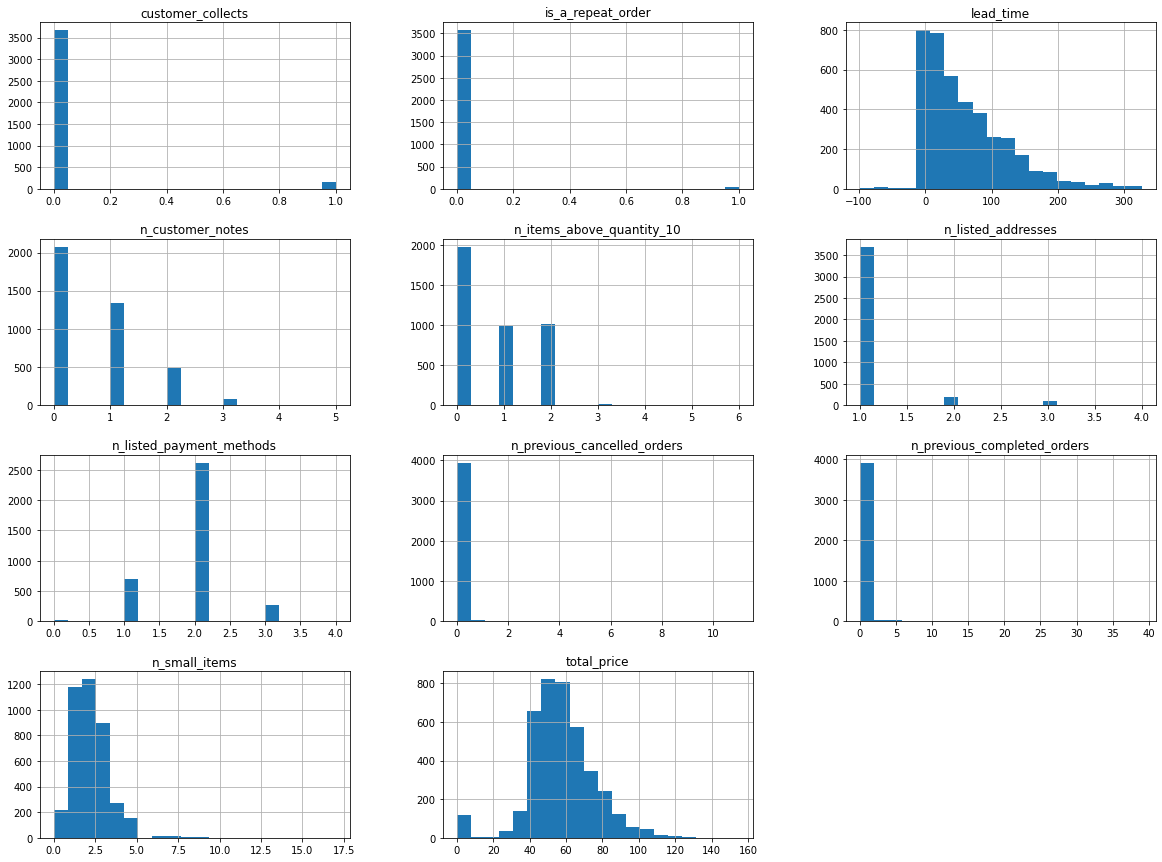

In [6]:
# Inspecting the distribution of each (numerical) variable
import matplotlib.pyplot as plt
GHS_data.hist(bins=20, figsize=(20,15))
plt.show()

Note One: The histogram for the "lead_time" attribute appears questionable due to the presence of negative values, which are illogical since time should only be positive.

Note Two: A number of entries in the "total_price" attribute are recorded as 0, which also seems questionable.

Note Three: The "customer_collects" and "is_a_repeat_order" columns are binary variables, meaning they only take on values of 0 or 1.

Note Four: Most attributes are categorical, with the exception of "lead_time" and "total_price".

Note Five: The numerical attributes are on very different scales. For instance, "lead_time" ranges from -100 to approximately 350, whereas "customer_collects" ranges from 0 to 1.

In [7]:
### More about the column "lead_time": how many lead times are negative?
number_negative_lead_time = sum(GHS_data['lead_time'] < 0)
number_all_none_na_lead_time = 4000 - GHS_data['lead_time'].isna().sum() 
print('Number of negative lead time:',number_negative_lead_time, '\nRatio of negative lead time:', number_negative_lead_time/number_all_none_na_lead_time)

Number of negative lead time: 125 
Ratio of negative lead time: 0.03125


<font color='red'> Concern One: </font> 125 over 4000 (3.125\%) entries of the attribute "lead_time" are negative. 

Given the description of "lead_time":

* The time, in days, between the order being placed and being delivered to the customer.

The values should always be positive. 

This may not necessarily be a problem for our model, but the reason behind these negative numbers is worth investigating.

In [8]:
### More about the column "total_price": how many total price are 0?
number_zero_total_price = sum(GHS_data['total_price'] == 0)
number_all_none_na_total_price = 4000 - GHS_data['total_price'].isna().sum() 
print('Number of zero total price:',number_zero_total_price, '\nRatio of zero total price:', number_zero_total_price/number_all_none_na_total_price)

Number of zero total price: 104 
Ratio of zero total price: 0.026


<font color='red'> Concern Two: </font> 104 over 4000 (2.6\%) entries of the column "total price" are zero. 

Given the description of "total_price":

* Total price of the customer’s order.

The values should not be 0. 

### 1.2.2 Summary of Non-numerical Attributes

In [9]:
# Summarize data with object type. 
GHS_data['id'].value_counts()

id
TID32798    1
TID01779    1
TID14470    1
TID25257    1
TID17295    1
           ..
TID30448    1
TID33738    1
TID12397    1
TID07825    1
TID17223    1
Name: count, Length: 4000, dtype: int64

In [10]:
print('number of unique order id:', GHS_data['id'].nunique())

number of unique order id: 4000


All order id are different, so we do not have problem with duplicate data.

In [12]:
GHS_data['app_or_website'].value_counts()

app_or_website
website      2127
app          1481
whoosh        318
telephone      74
Name: count, dtype: int64

There are four platforms where orders can be placed. The website is the most common platform, accounting for more than half of the orders, while the telephone is the least common.

In [13]:
GHS_data['customer_segmentation'].value_counts()

customer_segmentation
group_1    3099
group_4     659
group_2     103
group_6      87
group_5      34
Name: count, dtype: int64

Customers are segmented into 5 groups. Notebly, the segmentation is not even, with group 1 having more than 75\% customers and group 5 have less than 1\%.  

In [14]:
GHS_data['payment_type'].value_counts()

payment_type
debit     3574
credit     426
Name: count, dtype: int64

There are two payment types: debit and credit.

In [15]:
GHS_data['slot_date'].value_counts()

slot_date
2018-07-22 00:00:00    49
2018-08-26 00:00:00    48
2018-09-23 00:00:00    44
2019-05-16 00:00:00    38
2018-09-09 00:00:00    33
                       ..
2018-09-10 00:00:00     1
2018-09-05 00:00:00     1
2018-12-17 00:00:00     1
2018-10-23 00:00:00     1
2018-11-06 00:00:00     1
Name: count, Length: 396, dtype: int64

In [16]:
min_time = GHS_data['slot_date'].min()
max_time = GHS_data['slot_date'].max()
print('Earliest order data:',min_time, '\nLatest order data:',  max_time)

Earliest order data: 2018-06-08 00:00:00 
Latest order data: 2019-07-31 00:00:00


The dates of the delivery to the customer are between 2018-06-08 to 2019-07-31.

In [17]:
GHS_data['store_number'].value_counts()

store_number
id_2     58
id_56    54
id_93    52
id_96    51
id_20    50
         ..
id_55    31
id_0     29
id_52    28
id_5     23
id_32    23
Name: count, Length: 100, dtype: int64

There are 100 different stores the orders are assigned to.

In [18]:
GHS_data['status'].value_counts()

status
Not_Canceled    3852
Canceled         148
Name: count, dtype: int64

Note One: There are only two results of the "status", either Not_Canceled or Canceled.

Note Two: In the training dataset, 148 over 4000 (3.7\%) orders are canceled.

<font color='red'> Important Note: </font> The dataset is quite imbalanced, with only a small proportion of orders being canceled. This imbalance may cause our model to be very conservative in predicting a positive result, i.e., that an order will be canceled.

## 1.3 Split train and test set 

Here we create a test set, before we explore more about the dataset. Given that the dataset is quite imbalanced, we will use a stratified shuffle strategy to ensure that both the training and testing datasets are representative of the entire dataset.

The test set will be used for evaluated our model in Section 2.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(GHS_data, GHS_data['status']):
    train_set = GHS_data.loc[train_index]
    test_set = GHS_data.loc[test_index]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.4 Discover Data to Gain More Insights

### 1.4.1 Look for Correlations.

In [20]:
### We now investigate correlations between attributes. In particular, we are interested in the correlations between "status" and other attributes.
### To do so, we will need to convert all entries to numbers. 
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder.
ordinal_encoder = OrdinalEncoder()

# We want to keep the original data.
GHS_data_encoded = train_set.copy()

# Keep time ordered from small to large
GHS_data_encoded['slot_date'] = pd.to_datetime(GHS_data_encoded['slot_date']).astype('int64') //10**9

# Select only object Dtype columns.
object_cols = GHS_data_encoded.select_dtypes(include=['object']).columns

# Apply the encoder to the object columns.
GHS_data_encoded[object_cols] = ordinal_encoder.fit_transform(GHS_data_encoded[object_cols])

In [21]:
GHS_data_encoded.head()

,id,app_or_website,customer_collects,customer_segmentation,is_a_repeat_order,lead_time,n_customer_notes,n_items_above_quantity_10,n_listed_addresses,n_listed_payment_methods,n_previous_cancelled_orders,n_previous_completed_orders,n_small_items,payment_type,slot_date,store_number,total_price,status
3461,1774.0,0.0,0.0,0.0,0.0,82.875196,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1536278400,92.0,65.347095,1.0
3890,432.0,2.0,0.0,0.0,0.0,8.007013,2.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,1536278400,12.0,84.550025,1.0
2702,2839.0,2.0,0.0,0.0,0.0,81.148165,0.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0,1552262400,63.0,45.571930,1.0
2761,338.0,2.0,0.0,0.0,0.0,0.183979,0.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0,1531699200,25.0,52.992522,1.0
3287,2056.0,2.0,0.0,2.0,0.0,52.913407,1.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,1554163200,60.0,68.795697,0.0


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder.
ordinal_encoder = OrdinalEncoder()

# We want to keep the original data.
GHS_data_encoded = GHS_data.copy()

# Select only object Dtype columns.
object_cols = GHS_data_encoded.select_dtypes(include=['object']).columns

# Apply the encoder to the object columns.
GHS_data_encoded[object_cols] = ordinal_encoder.fit_transform(GHS_data[object_cols])

In [23]:
corr_matrix = GHS_data_encoded.select_dtypes(exclude=['object']).corr(method='spearman')  ## since the data does not looks like normal distibuted, here we use non-parametric correlation  
corr_matrix['status'].sort_values()

lead_time                     -0.136970
total_price                   -0.085180
slot_date                     -0.084145
n_listed_addresses            -0.030263
store_number                  -0.026304
n_listed_payment_methods      -0.016205
n_small_items                 -0.015253
n_items_above_quantity_10     -0.010651
app_or_website                -0.004087
customer_segmentation          0.009801
id                             0.020287
is_a_repeat_order              0.021390
n_previous_cancelled_orders    0.024994
customer_collects              0.032760
n_previous_completed_orders    0.036062
payment_type                   0.065423
n_customer_notes               0.082471
status                         1.000000
Name: status, dtype: float64

It can be observed that "status" has the strongest statistical correlation with "lead_time," suggesting that this variable may have the largest impact on the "status" results.

In [24]:
GHS_data_encoded['status'][1:10]

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: status, dtype: float64

In [25]:
GHS_data['status'][1:10]

1    Not_Canceled
2    Not_Canceled
3    Not_Canceled
4    Not_Canceled
5    Not_Canceled
6    Not_Canceled
7    Not_Canceled
8    Not_Canceled
9    Not_Canceled
Name: status, dtype: object

Encoder convert "Not_Canceled" to 1 and "Canceled" to 0.

In [26]:
mean_lead_time_Canceled = GHS_data_encoded[GHS_data_encoded['status'] == 0]['lead_time'].mean()
mean_lead_time_Not_Canceled = GHS_data_encoded[GHS_data_encoded['status'] == 1]['lead_time'].mean()
print('Average lead time of cancled orders:', mean_lead_time_Canceled, '\nAverage lead time of not cancled orders:', mean_lead_time_Not_Canceled)

Average lead time of cancled orders: 119.72266432216344 
Average lead time of not cancled orders: 58.84917890892164


The difference of the average time of cancled orders and not cancled orders is indeed very significant.

array([[<AxesSubplot:xlabel='status', ylabel='status'>,
        <AxesSubplot:xlabel='lead_time', ylabel='status'>,
        <AxesSubplot:xlabel='total_price', ylabel='status'>,
        <AxesSubplot:xlabel='slot_date', ylabel='status'>,
        <AxesSubplot:xlabel='n_customer_notes', ylabel='status'>],
       [<AxesSubplot:xlabel='status', ylabel='lead_time'>,
        <AxesSubplot:xlabel='lead_time', ylabel='lead_time'>,
        <AxesSubplot:xlabel='total_price', ylabel='lead_time'>,
        <AxesSubplot:xlabel='slot_date', ylabel='lead_time'>,
        <AxesSubplot:xlabel='n_customer_notes', ylabel='lead_time'>],
       [<AxesSubplot:xlabel='status', ylabel='total_price'>,
        <AxesSubplot:xlabel='lead_time', ylabel='total_price'>,
        <AxesSubplot:xlabel='total_price', ylabel='total_price'>,
        <AxesSubplot:xlabel='slot_date', ylabel='total_price'>,
        <AxesSubplot:xlabel='n_customer_notes', ylabel='total_price'>],
       [<AxesSubplot:xlabel='status', ylabel='slot_dat

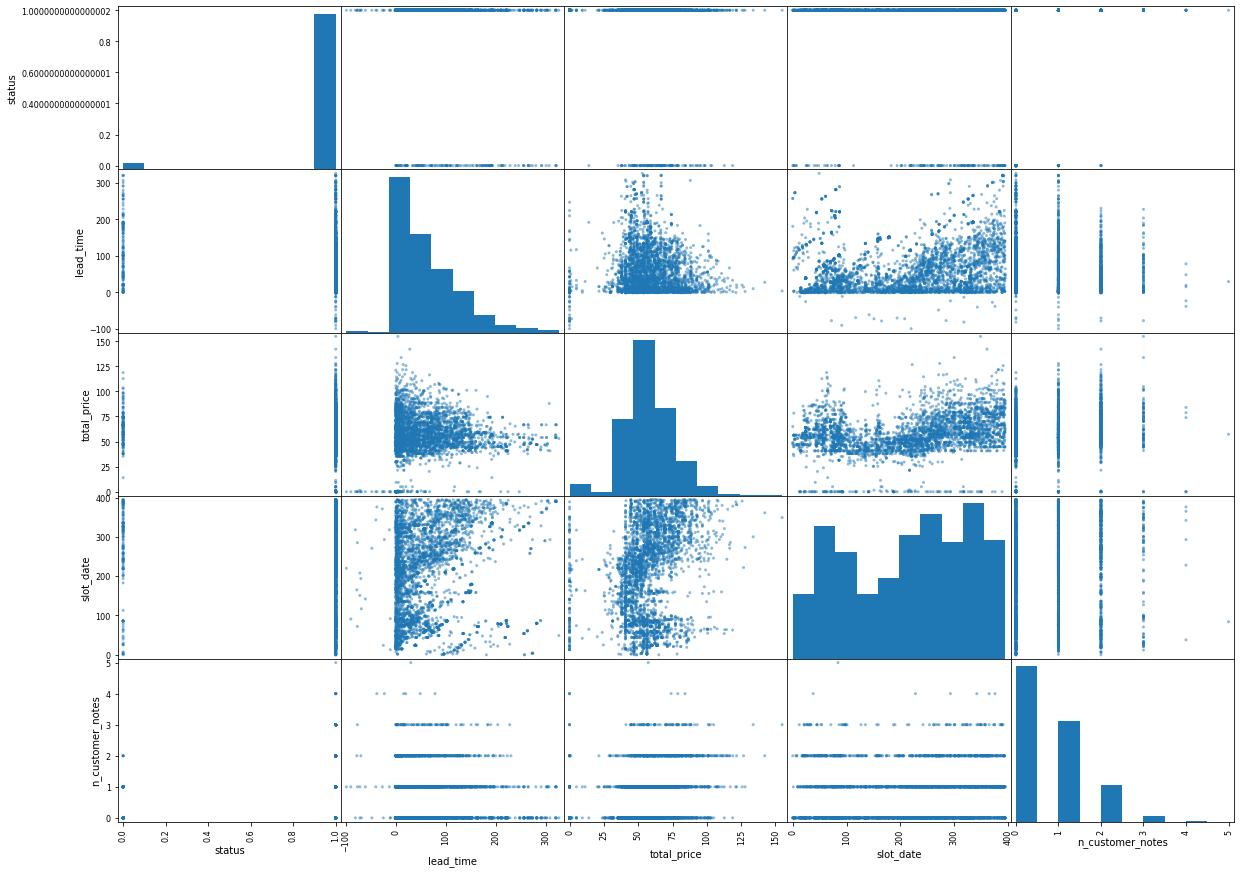

In [27]:
### Let us now visualize the corrlations using scatter plots

from pandas.plotting import scatter_matrix

### choose the variables with the top-5 strongest correlations with status
plot_variables = corr_matrix['status'].abs().sort_values(ascending=False).head().index.tolist()

scatter_matrix(GHS_data_encoded[plot_variables], figsize=(20,15))


This plot shows that all the other four variables have strong correlations with "status". In the first row, the patterns of the four variables differ significantly when "status" equals 0 or 1.

Additionally, this plot reveals that variables other than "status" can also be correlated. For instance, in row 2, column 4, "lead_time" is clearly correlated with "n_customer_notes".

From this plot, it becomes clear that when the values of "lead_time" are negative, "status" is always 1 (Not Canceled). Additionally, when the values of "total_price" are close to 0, "status" is also 1.

In [28]:
###
ratio_negative_lead_time_to_Not_Canceled =  sum(GHS_data_encoded[GHS_data_encoded['lead_time'] < 0]['status'])/sum(GHS_data_encoded['lead_time'] < 0)
ratio_zero_total_price_to_Not_Canceled =  sum(GHS_data_encoded[GHS_data_encoded['total_price'] == 0]['status'])/sum(GHS_data_encoded['total_price'] == 0)
print('Percentage of not canceled with negative lead time:', ratio_negative_lead_time_to_Not_Canceled, '\nPercentage of not canceled with zero total price:', ratio_zero_total_price_to_Not_Canceled)

Percentage of not canceled with negative lead time: 1.0 
Percentage of not canceled with zero total price: 1.0


The two numbers reveal that in the training dataset, whenever the lead time is negative or the total price is 0, the status will be "Not Canceled." Of course, these may be coincidences since only 3.7% of orders are canceled. However, given these results, our model may learn that whenever the lead time is negative or the total price is 0, the status will be "Not Canceled." Again, the reason behind these unreasonable numbers needs to be checked.

## 1.5 Prepare the Data for our Model

We have a fews things to do for preparing the data for building our model:

1. Deal with missing data.

2. Convert object attributes to numbers.

3. Feature Scaling.

In [29]:
### copy the data from train_set
GHS_data_train = train_set.drop('status', axis = 1)
GHS_data_train_labels = train_set['status'].copy()

In [30]:
### Deal with ID first (if the IDs are assigned purely random, then ID may be discarded for training models)
from sklearn.base import BaseEstimator,TransformerMixin
class ConvertIDtoNumber(BaseEstimator, TransformerMixin):
    def __init__(self, keepID = False):
        self.keepID = keepID
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X = X.copy()
        if self.keepID:
            X['id'] = X['id'].str.replace('TID','').astype(int)
        else:
            X = X.drop('id',axis = 1)
        return(X)


In [31]:
### Deal with slot_time
class DivideSlotDate(BaseEstimator, TransformerMixin):
    def __init__(self,keepSlotDate = True):
        self.keepSlotDate = keepSlotDate
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X = X.copy()
        if self.keepSlotDate:
            X['slot_date_year'] = pd.to_datetime(GHS_data['slot_date']).dt.year
            X['slot_date_month'] = pd.to_datetime(GHS_data['slot_date']).dt.month
            X['slot_date_day'] = pd.to_datetime(GHS_data['slot_date']).dt.day
            X = X.drop('slot_date',axis = 1)
        else:
            X = X.drop('slot_date',axis = 1)
        return(X)

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

num_attribs = GHS_data_train.select_dtypes(exclude=['object']).columns.tolist()
cat_attribs = GHS_data_train.select_dtypes(include=['object']).columns.tolist()

# covert time date to year, month ,and day
cat_attribs.remove('slot_date')
cat_attribs = cat_attribs + ['slot_date_year', 'slot_date_month', 'slot_date_day']

# delete id
cat_attribs.remove('id')

# impute pipeline: for numerical attributes, median strategy is taken; for categorical attributes, most frequent stragety is taken.
impute_pipeline = Pipeline([
    ('impute', ColumnTransformer([
        ('impute_cat', SimpleImputer(strategy='most_frequent'), cat_attribs),
        ('impute_num', SimpleImputer(strategy='median'), num_attribs),
    ],remainder='passthrough',verbose_feature_names_out=False)),
])

# standarize pipeline
stand_attribs = ['slot_date_year', 'slot_date_month', 'slot_date_day', 'lead_time', 'n_customer_notes', 
 'n_items_above_quantity_10', 'n_listed_addresses', 'n_listed_payment_methods','n_previous_cancelled_orders', 
 'n_previous_completed_orders', 'n_small_items', 'total_price']

standarize_pipeline = ColumnTransformer([
    ('standarize', StandardScaler(), stand_attribs)
],remainder='passthrough',verbose_feature_names_out = False)

# convert pipeline
convert_pipeline = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(), ['app_or_website', 'customer_segmentation', 'payment_type', 'store_number'])
],remainder='passthrough')

full_pipeline = Pipeline([
    ('delete_id', ConvertIDtoNumber(keepID=False)),
    ('convert_slot_date', DivideSlotDate(keepSlotDate=True)),
    ('impute', impute_pipeline.set_output(transform='pandas')),
    ('standarize', standarize_pipeline.set_output(transform='pandas')),
    ('conver', convert_pipeline)
])

In [33]:
### fit and transform the training data
GHS_data_train_prepared = full_pipeline.fit_transform(GHS_data_train)


In [34]:
### let's take a look at the data after transforming
full_pipeline.transform(GHS_data_train.iloc[0:1,:]).toarray()

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [35]:
### Since our target attribute 'status' is object, we also need to convert them into numbers
target_encoder = OrdinalEncoder(categories=[['Not_Canceled', 'Canceled']])
GHS_data_train_labels_prepared = target_encoder.fit_transform(pd.DataFrame(GHS_data_train_labels))
GHS_data_train_labels_prepared

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Part II – Building the model 

Build a model to predict which orders are likely to be cancelled. Please show how you developed the model and report how well your model performs. 

## 2.1 Evaluation Methods

Before building any model, let us consider how we will evaluate our models.

The goal of our models is to predict whether orders are likely to be canceled (status == 1) or not canceled (status == 0). We will define the results as positive when the orders are canceled and negative when they are not canceled. Similarly, we will define the predictions as positive when a model predicts the order will be canceled and negative when it predicts the order will not be canceled.

A perfect model would make every prediction correctly. In other words, it would give positive predictions whenever the results are positive and negative predictions whenever the results are negative. However, in reality, such a model may never exist due to the inherent randomness of the data. Therefore, we aim to find a model that is "as good as possible," which requires us to define the performance of a model.

Common measures for 0-1 classification tasks are accuracy, precision, and recall. Accuracy measures the ratio of correct predictions, precision measures the accuracy of predicting positive results, and recall measures the ratio of positive results correctly detected. These three measures should be considered together when evaluating a model. For example:

    If a model always produces negative predictions, it could have an accuracy of over 95% (remember our data has less than 5% positive results).
    If a model always produces positive predictions, it will have a recall score of 1.
    If a model is very conservative and predicts one positive case correctly, it will have a precision score of 1.

The above three models will achieve high scores for accuracy, precision, and recall separately, but it is clear that none of these models would be ideal.

### 2.1.1 Fixed Recall

A common approach to addressing the above issue is to control either the precision or recall score and evaluate the other score. Suppose a model has a precision score of 95%, meaning its accuracy in predicting positive results is 95%. In that case, it would be better to have a high recall score. Conversely, if a model has a recall score of 95%, meaning it correctly detects 95% of the positive results, it would be better to have a high precision score. Unfortunately, models with higher precision typically have lower recall and vice versa.

In practice, the choice between prioritizing recall or precision and determining the target level for either depends on the costs associated with making a false positive or a false negative prediction. For instance, suppose we want to identify as many canceled orders as possible so that the GHS team can plan interventions, such as in-app or email reminders, in advance of the delivery date. In this case, we might set the recall score to 99%, meaning our model can detect 99% of the positive results. However, this approach is likely to result in a lower precision score, meaning negative results will be more likely to be predicted as positive. Consequently, customers who do not intend to cancel their orders might still receive reminders, which could cause dissatisfaction if they are contacted without a valid reason.

For these reasons, it is advisable to consult the GHS team before building our model. In the following analysis, we will fix the recall score at 80% for our models and consider models with higher precision scores to be better.

## 2.1 Baseline Model: Randomly Guessing

Let's begin with a baseline model that randomly guesses whether an order will be canceled.

In [36]:
from scipy.stats import bernoulli
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class BaselineModel(BaseEstimator, ClassifierMixin):
    def __init__(self, augment = 1):
        self.canceled_probability = None
        self.augment = augment   
    def fit(self, X, y):
        self.canceled_probability = self.augment * sum(y == 1) / len(y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        number_results = X.shape[0]
        return bernoulli.rvs(self.canceled_probability, size=number_results)

In [37]:
baseline_model = BaselineModel()
baseline_model.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared)
baseline_model.canceled_probability

array([0.036875])

### 2.1.1 Evaluate The Baseline Model using Cross-Validation

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score

np.random.seed(1)
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}

results = cross_validate(baseline_model, GHS_data_train_prepared, GHS_data_train_labels_prepared, scoring=scoring, cv=10, return_train_score=False)
# Extract the scores
baseline_model_recall = results['test_recall']
baseline_model_precision = results['test_precision']
baseline_model_accuracy = results['test_accuracy']


In [39]:
print('accuracy_score for baseline model:', baseline_model_accuracy.mean())
print('precision_score for baseline model:', baseline_model_precision.mean())
print('recall_score for baseline model:', baseline_model_recall.mean())

accuracy_score for baseline model: 0.9321875000000001
precision_score for baseline model: 0.06610082899556584
recall_score for baseline model: 0.07651515151515151


The accuracy score for this baseline model is over 93%. However, it has low precision and recall scores. Let's now plot the precision and recall scores for this baseline model by choosing different augmentation hyper-parameters.

In [40]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {'augment': np.arange(1, 25, 0.1)}  # Adjust the range as needed
grid_search = GridSearchCV(estimator=baseline_model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=10, return_train_score=False)
grid_search.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared)
baseline_model_results = grid_search.cv_results_

In [41]:
### plot precision and recall
def plot_precision_recall_vs_parameters(precisions, recalls,accuracy, parameters, vertical_line = True):
    plt.plot(parameters, precisions, 'g', label = 'Precision')
    plt.plot(parameters, recalls, 'b', label = 'Recall')
    plt.plot(parameters, accuracy, 'y', label = 'Accuracy')
    # Find the parameter where recall is closest to 80%
    target_recall = 0.8
    closest_index = np.argmin(np.abs(recalls - target_recall))
    closest_parameter = parameters[closest_index]
    closest_precision = precisions[closest_index]
    closest_accuracy = accuracy[closest_index]
    # Plot vertical line at this parameter
    if vertical_line:
        plt.axvline(x=closest_parameter, color='red', linestyle='--', label=f'Recall ~ 80% (X-axis={closest_parameter:.2f})')

    return closest_precision, closest_accuracy

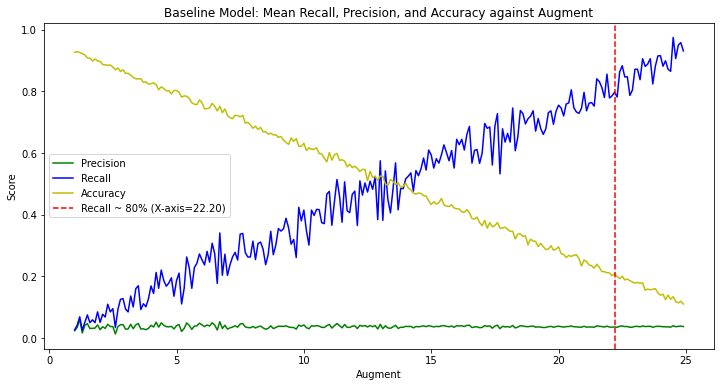

In [42]:
plt.figure(figsize=(12, 6))
baseline_final_precision, baseline_final_accuracy = plot_precision_recall_vs_parameters(baseline_model_results['mean_test_precision'], baseline_model_results['mean_test_recall'],  baseline_model_results['mean_test_accuracy'],np.arange(1, 25, 0.1) )
plt.xlabel('Augment')
plt.ylabel('Score')
plt.title('Baseline Model: Mean Recall, Precision, and Accuracy against Augment')
plt.legend()
plt.show()

In [43]:
print('When the recall score is 0.8, the precision score for base line model is around:', baseline_final_precision)
print('the accuracy score for base line model is around:', baseline_final_accuracy)

When the recall score is 0.8, the precision score for base line model is around: 0.036094240874107654
the accuracy score for base line model is around: 0.20843749999999997


## 2.2 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()

### 2.2.1 Evaluate The Logistic Regression using Cross Validation

In [45]:
results = cross_validate(logis_reg, GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel(), scoring=scoring, cv=10, return_train_score=False)
# Extract the scores
logis_recall = results['test_recall']
logis_precision = results['test_precision']
logis_accuracy = results['test_accuracy']


/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
print('accuracy_score for logistic model:', logis_accuracy.mean())
print('precision_score for logistic model:', logis_precision.mean())
print('recall_score for logistic model:', logis_recall.mean())

accuracy_score for logistic model: 0.9650000000000001
precision_score for logistic model: 0.5833333333333333
recall_score for logistic model: 0.08636363636363635


The logistic regression model outperforms the baseline model across all three scores, which is promising. However, the precision and recall scores are still relatively low, with the recall score being only 8%. This low recall may be due to the imbalance in the dataset, where there are significantly more samples with negative results than positive results.

To address this, let's try to improve the model by giving more weight to the samples with positive results.

In [48]:
## default
weighted_logis_reg = LogisticRegression(class_weight='balanced')

In [49]:
results = cross_validate(weighted_logis_reg, GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel(), scoring=scoring, cv=10, return_train_score=False)
# Extract the scores
logis_recall = results['test_recall']
logis_precision = results['test_precision']
logis_accuracy = results['test_accuracy']
print('accuracy_score for logistic model:', logis_accuracy.mean())
print('precision_score for logistic model:', logis_precision.mean())
print('recall_score for logistic model:', logis_recall.mean())


accuracy_score for logistic model: 0.8018749999999999
precision_score for logistic model: 0.1070475522806416
recall_score for logistic model: 0.5916666666666667


The recall score has improved significantly, but the precision score has dropped to 0.10. This suggests that we might not be choosing the optimal weight. Let's try different weights to find a better balance between precision and recall.

In [50]:
logis_reg = LogisticRegression(max_iter=1000)
positive_weights =  [1,2,5,8,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120,150,200]
param_grid = {
    'class_weight': [{1: w, 0: 1} for w in positive_weights]
}
grid_search = GridSearchCV(estimator=logis_reg, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=10, return_train_score=False)
grid_search.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())
logis_model_results = grid_search.cv_results_

/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
logis_mean_precision_score = logis_model_results['mean_test_precision']
logis_mean_recall_score = logis_model_results['mean_test_recall']
logis_mean_accuracy_score = logis_model_results['mean_test_accuracy']

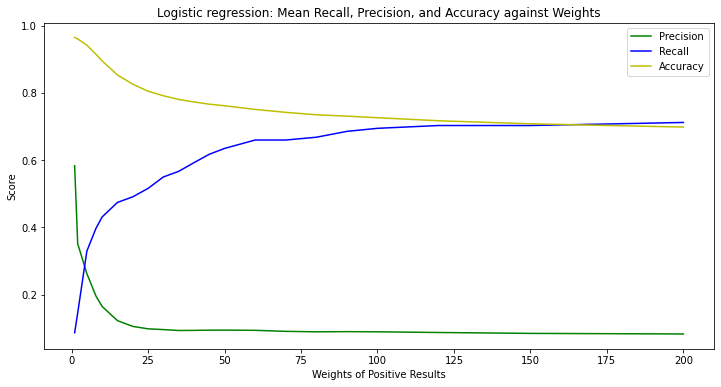

In [52]:
plt.figure(figsize=(12, 6))
plot_precision_recall_vs_parameters(logis_mean_precision_score, logis_mean_recall_score,  logis_mean_accuracy_score, positive_weights, vertical_line=False)
plt.xlabel('Weights of Positive Results')
plt.ylabel('Score')
plt.title('Logistic regression: Mean Recall, Precision, and Accuracy against Weights')
plt.legend()
plt.show()

It can be observed that as the weight of positive results increases, the logistic regression model indeed becomes less conservative in making positive predictions. However, the precision drops quickly. Additionally, even when the weight of positive results is increased to 200, the recall score is not significantly different from when the weight is 100.

In [53]:
### choose the weights using F_1 score
logis_mean_f1_scores = 2 * (logis_mean_precision_score * logis_mean_recall_score) / (logis_mean_precision_score + logis_mean_recall_score)
print('The best positive weight according to F_1 score is:', positive_weights[np.argmax(logis_mean_f1_scores)])

The best positive weight according to F_1 score is: 5


Given a positive weight of 5, let's now adjust the threshold of the logistic regression model to achieve a recall score of 0.95.

In [54]:
from sklearn.model_selection import cross_val_predict

weighted_logis_reg = LogisticRegression(max_iter=1000, class_weight= {1: 5, 0: 1})

logis_scores = cross_val_predict(weighted_logis_reg, GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel(), cv = 3, method='decision_function')

In [55]:
from sklearn.metrics import precision_recall_curve

weighted_logis_precisions, weighted_logis_recalls, weighted_logis_thresholds =  precision_recall_curve(GHS_data_train_labels_prepared.ravel(), logis_scores, pos_label=1)

In [58]:
### compute accuracy
def compute_accuracy_at_thresholds(y_true, scores, thresholds):
    accuracies = []
    for threshold in thresholds:
        y_pred = (scores >= threshold).astype(int)
        TP = np.sum((y_true == 0) & (y_pred == 0))
        TN = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 1) & (y_pred == 0))
        FN = np.sum((y_true == 0) & (y_pred == 1))
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        accuracies.append(accuracy)
    return accuracies

weighted_logis_accuracies = compute_accuracy_at_thresholds(GHS_data_train_labels_prepared.ravel(), logis_scores, weighted_logis_thresholds)

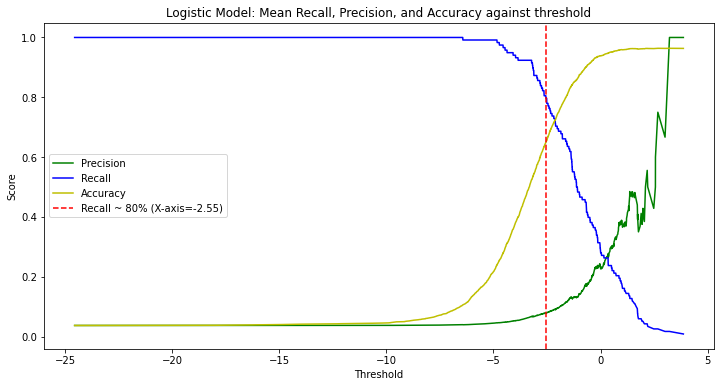

In [59]:
plt.figure(figsize=(12, 6))
logistic_final_precision, logistic_final_accuracy = plot_precision_recall_vs_parameters(weighted_logis_precisions[:-1], weighted_logis_recalls[:-1], weighted_logis_accuracies, weighted_logis_thresholds )
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Logistic Model: Mean Recall, Precision, and Accuracy against threshold')
plt.legend()
plt.show()

In [60]:
print('When the recall score is 0.8, the precision score for logistic regression is around:', logistic_final_precision)
print('the accuracy score for logistic regression is around:', logistic_final_accuracy)

When the recall score is 0.8, the precision score for logistic regression is around: 0.07872696817420435
the accuracy score for logistic regression is around: 0.64875


The logistic regression model is only slightly better than random guessing. This suggests that the model might not be powerful enough and could be underfitting. Let's investigate further to determine if underfitting is the issue.

In [61]:
weighted_logis_reg.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())

weighted_logis_reg_scores = weighted_logis_reg.decision_function(GHS_data_train_prepared)

predictions = (weighted_logis_reg_scores >= -2.55).astype(int)

#predictions = weighted_logis_reg.predict(GHS_data_train_prepared)

accuracy_score(predictions, GHS_data_train_labels_prepared.ravel())

print('Accuracy of logistic regression on training dataset:', accuracy_score(GHS_data_train_labels_prepared.ravel(), predictions))
print('Precision of logistic regression on training dataset:', precision_score(GHS_data_train_labels_prepared.ravel(), predictions) )
print('Recall of logistic regression on training dataset:', recall_score(GHS_data_train_labels_prepared.ravel(), predictions))

Accuracy of logistic regression on training dataset: 0.64
Precision of logistic regression on training dataset: 0.0890302066772655
Recall of logistic regression on training dataset: 0.9491525423728814


It appears that the logistic regression model is underfitting, as the scores are not good even on the training data. This indicates that the model is not capturing the underlying patterns in the data adequately. Let's consider more complex models to improve performance.

## 2.3 Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifer = RandomForestClassifier(random_state=2)

In [63]:
results = cross_validate(random_forest_classifer, GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel(), scoring=scoring, cv=10, return_train_score=False)
rfc_recall = results['test_recall']
rfc_precision = results['test_precision']
rfc_accuracy = results['test_accuracy']

/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
print('accuracy_score for rfc model:', rfc_accuracy.mean())
print('precision_score for rfc model:', rfc_precision.mean())
print('recall_score for rfc model:', rfc_recall.mean())

accuracy_score for rfc model: 0.9678125
precision_score for rfc model: 0.8
recall_score for rfc model: 0.12954545454545455


This already looks much better than logistic regression! However, the random forest model is still conservative in making positive predictions, likely due to the imbalance in the dataset. Let's address this issue by giving more weight to the positive samples.

In [65]:
rfc_model = RandomForestClassifier(random_state = 2)
positive_weights =  [1,2,5,8,10,20]
param_grid = {
    'class_weight': [{1: w, 0: 1} for w in positive_weights]
}
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=10, return_train_score=False)
grid_search.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())
rfc_model_results = grid_search.cv_results_

/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ma-yz720/.local/lib/python3.10/sit

In [66]:
rfc_mean_precision_score = rfc_model_results['mean_test_precision']
rfc_mean_recall_score = rfc_model_results['mean_test_recall']
rfc_mean_accuracy_score = rfc_model_results['mean_test_accuracy']

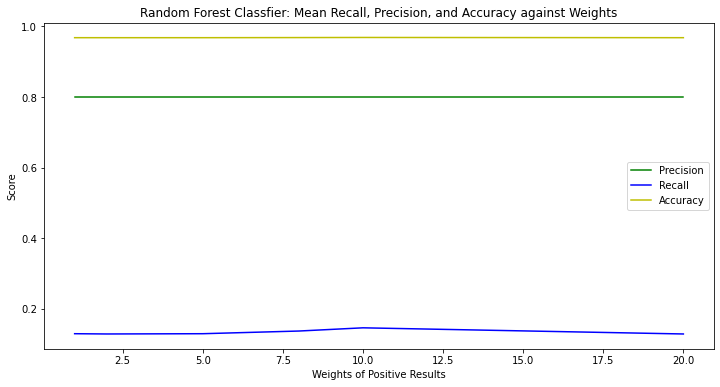

In [67]:
plt.figure(figsize=(12, 6))
plot_precision_recall_vs_parameters(rfc_mean_precision_score, rfc_mean_recall_score,  rfc_mean_accuracy_score, positive_weights, vertical_line=False)
plt.xlabel('Weights of Positive Results')
plt.ylabel('Score')
plt.title('Random Forest Classfier: Mean Recall, Precision, and Accuracy against Weights')
plt.legend()
plt.show()

Giving more weights to positive results are not helpful for training the random forest model. Let's set the weights as balanced.

In [ ]:
### Tunining random forest.
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20,50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(class_weight = 'balanced',random_state=2)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring = scorer)

### Warning: this may take some time 
rfc_model_results = grid_search.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())

In [69]:
print('The Best F_1 score of random forest:', rfc_model_results.best_score_)

The Best F_1 score of random forest: 0.31881451881451883


Let's see if this model is underfitting

In [70]:
# Retrieve the best model
best_model = rfc_model_results.best_estimator_

# Make predictions on the training data
predictions = best_model.predict(GHS_data_train_prepared)

# Calculate precision, recall, and accuracy
rfc_accuracy_score = accuracy_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_precision_score = precision_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_recall_score = recall_score(GHS_data_train_labels_prepared.ravel(), predictions)

In [71]:
print('Accuracy of the best model on training dataset:', rfc_accuracy_score)
print('Precision of the best model on training dataset:', rfc_precision_score)
print('Recall of the best model on training dataset:', rfc_recall_score)

Accuracy of the best model on training dataset: 0.9871875
Precision of the best model on training dataset: 0.7421383647798742
Recall of the best model on training dataset: 1.0


It seems like the model is overfitting. Let's check the F_1 score.

In [72]:
rfc_mean_f1_scores = 2 * (rfc_precision_score * rfc_recall_score) / (rfc_precision_score + rfc_recall_score)
rfc_mean_f1_scores

0.851985559566787

That's correct, the model is overfitting. Since the performances using cross validation is much worse. Let us exaime the hyper-parameters here.

In [73]:
rfc_model_results.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

Maybe the max_depth and n_estimators are too large.

In [ ]:
### Tunining random forest.
scorer = make_scorer(f1_score)
# Define the parameter grid
param_grid = {
    'n_estimators': [30,50],
    'max_depth': [20,30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(class_weight='balanced',random_state=2)

# Initialize GridSearchCV
grid_search_second_time = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring = scorer)

### Warning: this may take some time 
rfc_model_results_second_time = grid_search_second_time.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())

In [75]:
print('The Best F_1 score of random forest:', rfc_model_results_second_time.best_score_)

The Best F_1 score of random forest: 0.34990344622697556


In [76]:
rfc_model_results_second_time.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 30}

In [77]:
# Retrieve the best model
best_model_second_time = rfc_model_results_second_time.best_estimator_

# Make predictions on the training data
predictions = best_model_second_time.predict(GHS_data_train_prepared)

# Calculate precision, recall, and accuracy
rfc_accuracy_score = accuracy_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_precision_score = precision_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_recall_score = recall_score(GHS_data_train_labels_prepared.ravel(), predictions)
print('Accuracy of the best model on training dataset:', rfc_accuracy_score)
print('Precision of the best model on training dataset:', rfc_precision_score)
print('Recall of the best model on training dataset:', rfc_recall_score)

Accuracy of the best model on training dataset: 0.998125
Precision of the best model on training dataset: 0.9516129032258065
Recall of the best model on training dataset: 1.0


This seems like overfitting as well, let's check its F-1 score.

In [78]:
rfc_mean_f1_scores = 2 * (rfc_precision_score * rfc_recall_score) / (rfc_precision_score + rfc_recall_score)
rfc_mean_f1_scores

0.9752066115702479

The model is still overfitted. Let's reduce more features of the model.

In [ ]:
### Tunining random forest.
scorer = make_scorer(f1_score)
# Define the parameter grid
param_grid = {
    'n_estimators': [10,15],
    'max_depth': [8,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(class_weight = 'balanced', random_state=2)

# Initialize GridSearchCV
grid_search_third_time = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring = scorer)

### Warning: this may take some time 
rfc_model_results_third_time = grid_search_third_time.fit(GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel())

In [80]:
print('The Best F_1 score of random forest:', rfc_model_results_third_time.best_score_)

The Best F_1 score of random forest: 0.29703875072296126


In [81]:
rfc_model_results_third_time.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 15}

In [82]:
# Retrieve the best model
best_model_third_time = rfc_model_results_third_time.best_estimator_

# Make predictions on the training data
predictions = best_model_third_time.predict(GHS_data_train_prepared)

# Calculate precision, recall, and accuracy
rfc_accuracy_score = accuracy_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_precision_score = precision_score(GHS_data_train_labels_prepared.ravel(), predictions)
rfc_recall_score = recall_score(GHS_data_train_labels_prepared.ravel(), predictions)
print('Accuracy of the best model on training dataset:', rfc_accuracy_score)
print('Precision of the best model on training dataset:', rfc_precision_score)
print('Recall of the best model on training dataset:', rfc_recall_score)

Accuracy of the best model on training dataset: 0.93625
Precision of the best model on training dataset: 0.365625
Recall of the best model on training dataset: 0.9915254237288136


In [83]:
rfc_mean_f1_scores = 2 * (rfc_precision_score * rfc_recall_score) / (rfc_precision_score + rfc_recall_score)
rfc_mean_f1_scores

0.5342465753424657

Okay, this looks much better. Since the F1 score on the training dataset is not much higher than the score obtained using cross-validation, it indicates a better fit.

Let us now tune our model such that the recall is 0.8

In [84]:
best_rfc_model = best_model_third_time
rfc_probs = cross_val_predict(best_rfc_model, GHS_data_train_prepared, GHS_data_train_labels_prepared.ravel(), cv = 10, method='predict_proba')

In [87]:
# transfer to scores using the probability of positive results
rfc_scores = rfc_probs[:,1]

rfc_precisions, rfc_recalls, rfc_thresholds =  precision_recall_curve(GHS_data_train_labels_prepared.ravel(), rfc_scores)
rfc_accuracies = compute_accuracy_at_thresholds(GHS_data_train_labels_prepared.ravel(), rfc_scores, rfc_thresholds)

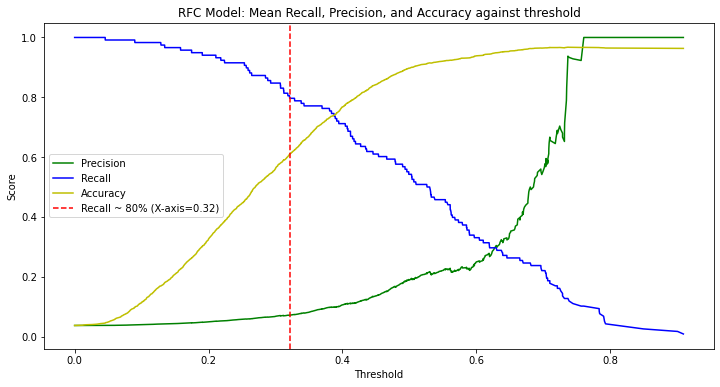

In [88]:
plt.figure(figsize=(12, 6))
rfc_final_precision, rfc_final_accuracy = plot_precision_recall_vs_parameters(rfc_precisions[:-1], rfc_recalls[:-1], rfc_accuracies, rfc_thresholds )
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('RFC Model: Mean Recall, Precision, and Accuracy against threshold')
plt.legend()
plt.show()

In [89]:
rfc_final_precision

0.07110438729198185

In [90]:
print('When the recall score is 0.8, the precision score for random forest classifer is around:', rfc_final_precision)
print('the accuracy score for random forest classifer is around:', rfc_final_accuracy)

When the recall score is 0.8, the precision score for random forest classifer is around: 0.07110438729198185
the accuracy score for random forest classifer is around: 0.60875


The precision sore using cross validation is roughly the same as logistic regression.

## 2.4 Evalute on Test Dataset

In [91]:
### For the purpose of evaluating our models, let us first prepare the test dataset.
GHS_data_test = test_set.drop('status', axis = 1)
GHS_data_test_prepared = full_pipeline.transform(GHS_data_test)
GHS_data_test_labels = test_set['status']
GHS_data_test_labels_prepared = target_encoder.transform(pd.DataFrame(GHS_data_test_labels))

### 2.4.1 Evaluate Baseline Model.

In [92]:
# Define parameter grid
param_grid = {'augment': np.arange(1, 25, 0.1)}  # Adjust the range as needed
grid_search = GridSearchCV(estimator=baseline_model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=10, return_train_score=False)
grid_search.fit(GHS_data_test_prepared, GHS_data_test_labels_prepared)
baseline_model_results = grid_search.cv_results_

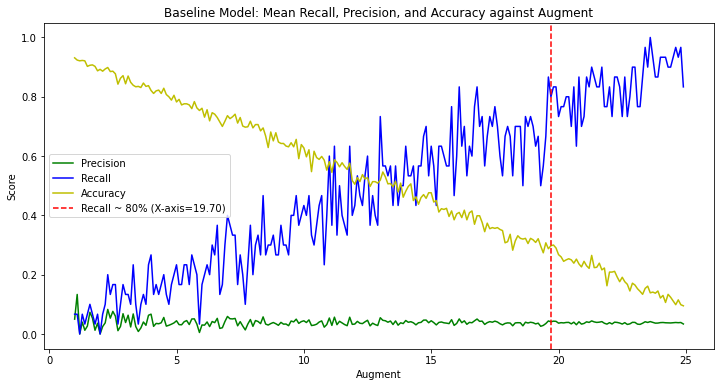

In [93]:
plt.figure(figsize=(12, 6))
baseline_final_precision, baseline_final_accuracy = plot_precision_recall_vs_parameters(baseline_model_results['mean_test_precision'], baseline_model_results['mean_test_recall'],  baseline_model_results['mean_test_accuracy'],np.arange(1, 25, 0.1) )
plt.xlabel('Augment')
plt.ylabel('Score')
plt.title('Baseline Model: Mean Recall, Precision, and Accuracy against Augment')
plt.legend()
plt.show()

In [94]:
print('When the recall score is 0.8, the precision score for base line model is around:', baseline_final_precision)
print('the accuracy score for base line model is around:', baseline_final_accuracy)

When the recall score is 0.8, the precision score for base line model is around: 0.04112303542304657
the accuracy score for base line model is around: 0.2975


### 2.4.2 Evaluate Logistic Regression Model

In [97]:
### compute score
logis_scores = weighted_logis_reg.decision_function(GHS_data_test_prepared)
weighted_logis_precisions, weighted_logis_recalls, weighted_logis_thresholds =  precision_recall_curve(GHS_data_test_labels_prepared.ravel(), logis_scores, pos_label=1)
weighted_logis_accuracies = compute_accuracy_at_thresholds(GHS_data_test_labels_prepared.ravel(), logis_scores, weighted_logis_thresholds)

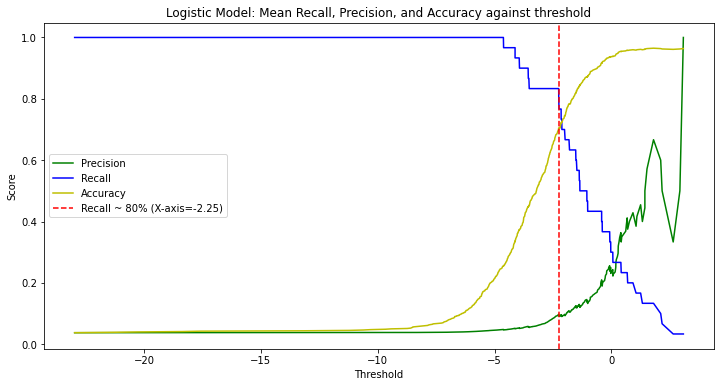

In [98]:
plt.figure(figsize=(12, 6))
logistic_final_precision, logistic_final_accuracy = plot_precision_recall_vs_parameters(weighted_logis_precisions[:-1], weighted_logis_recalls[:-1], weighted_logis_accuracies, weighted_logis_thresholds )
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Logistic Model: Mean Recall, Precision, and Accuracy against threshold')
plt.legend()
plt.show()

In [99]:
print('When the recall score is 0.8, the precision score for logistic regression is around:', logistic_final_precision)
print('the accuracy score for logistic regression is around:', logistic_final_accuracy)

When the recall score is 0.8, the precision score for logistic regression is around: 0.09411764705882353
the accuracy score for logistic regression is around: 0.70375


### 2.4.3 Evaluate Random Forest Classfier

In [101]:
rfc_probs = best_rfc_model.predict_proba(GHS_data_test_prepared)
rfc_scores = rfc_probs[:,1]
rfc_precisions, rfc_recalls, rfc_thresholds =  precision_recall_curve(GHS_data_test_labels_prepared.ravel(), rfc_scores)
rfc_accuracies = compute_accuracy_at_thresholds(GHS_data_test_labels_prepared.ravel(), rfc_scores, rfc_thresholds)

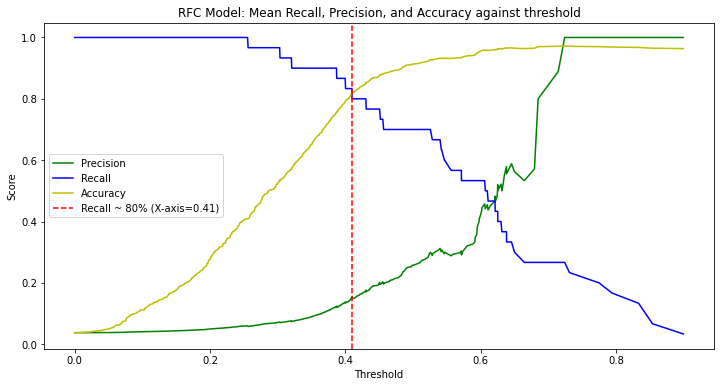

In [102]:
plt.figure(figsize=(12, 6))
rfc_final_precision, rfc_final_accuracy = plot_precision_recall_vs_parameters(rfc_precisions[:-1], rfc_recalls[:-1], rfc_accuracies, rfc_thresholds )
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('RFC Model: Mean Recall, Precision, and Accuracy against threshold')
plt.legend()
plt.show()

In [103]:
print('When the recall score is 0.8, the precision score for random forest classifer is around:', rfc_final_precision)
print('the accuracy score for random forest classifer is around:', rfc_final_accuracy)

When the recall score is 0.8, the precision score for random forest classifer is around: 0.14814814814814814
the accuracy score for random forest classifer is around: 0.82


### 2.4.4 Conclusion of model evalutation 

We have built three models: a baseline model that makes random guesses, a logistic regression model, and a random forest model. The final results show that when the recall score for the models is around 0.8 (i.e., the ratio of positive results correctly detected is around 80%), the baseline model, logistic regression model, and random forest model achieve precision scores (the accuracy of predicting positive results) of approximately 5.2%, 9.4%, and 14.8%, respectively.

# Part III – Making predictions 

The dataset contains details of future orders. Use your model to predict which orders are most likely to be cancelled and explain what recommendations you would give to the team that uses it. Use any tools that may help you share your findings with both technical and non-technical stakeholders, and comment on how you would look to improve the current results.

In [104]:
### load data needs to be predicted
GHS_data_predict = load_GHS_data('./tesco-dataset/df_predict.csv')

In [105]:
### Prepare the predict data
GHS_data_predict_prepared = full_pipeline.transform(GHS_data_predict)

In [106]:
### Make prediction using trained random forest model.

threshold = 0.41 ## this threshold will achieve recall score around 80%, according to the test set.
rfc_prediction_probs = best_rfc_model.predict_proba(GHS_data_predict_prepared)
rfc_prediction_scores = rfc_prediction_probs[:,1]
predictions = np.where(rfc_prediction_scores >= threshold, 'Canceled', 'Not_Canceled')

In [107]:
### download the prediction results
GHS_data_predict['predicted_status'] = predictions
GHS_data_predict.to_csv('./tesco-dataset/df_predict_with_results.csv')

In [108]:
GHS_data_predict.to_csv('./tesco-dataset/df_predict_with_results.csv')

### 3.1 Comments of the Model

To effectively utilize our model, it is crucial to clarify its purpose. Should the model prioritize predicting as many canceled orders as possible (i.e., achieve a higher recall score)? Or should it aim to avoid making too many incorrect canceled predictions (i.e., achieve a higher precision score)? As shown in Figure 2.4.3, unfortunately, increasing one score will decrease the other.

In this section, we aim to make predictions such that our model will predict 80% of the canceled orders. This number can be changed by adjusting the thresholds of the random forest.

**Why use our random forest model?** Among the three models, the random forest model performs the best (See Section 2.4). Its precision score is almost three times higher than that of the baseline model. While this number may not seem impressive at first glance, it demonstrates the model's practical utility. For example, suppose there are 1,000 orders to be predicted. Based on our dataset, it is reasonable to assume that around 4% of orders will be canceled. If both the baseline and random forest models are used for prediction with a recall score of 80%, they will each successfully predict about 32 orders that are likely to be canceled. Given the baseline model's precision score of 5.2%, it will make (1-0.052)/0.052 * 32 = 583 false positive prediction. In other words, there will be 583 unnecessary intervention towards customers who do not wish to cancel their order. In contrast, the random forest model, with its precision score of 14.8%, will make (1-0.148)/0.148 * 32 = 184 false positive predictions. Therefore, by using the random forest model instead of the baseline model, we could reduce the number of false positive predictions by 399 per 1,000 predictions.

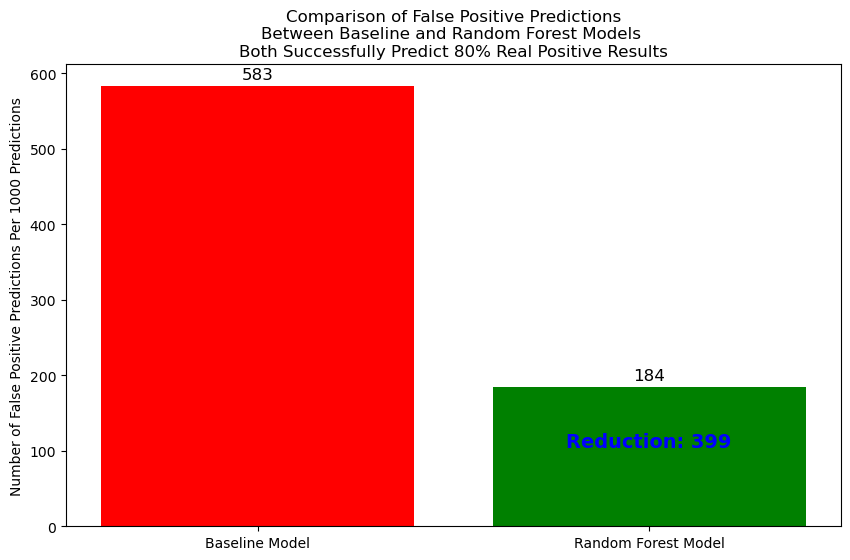

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Baseline Model', 'Random Forest Model']
false_positives = [583, 184]
reduction = 583 - 184

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(models, false_positives, color=['red', 'green'])
ax.set_ylabel('Number of False Positive Predictions Per 1000 Predictions')
ax.set_title('Comparison of False Positive Predictions\nBetween Baseline and Random Forest Models \nBoth Successfully Predict 80% Real Positive Results')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}', ha='center', va='bottom', color='black', fontsize=12)

# Add the reduction annotation
ax.text(1, 100, f'Reduction: {reduction}', ha='center', va='bottom', color='blue', fontsize=14, weight='bold')

plt.show()

### 3.2 Potential Improvments of Current Results.

First, we notice that this dataset has 4000 samples and 18 attributes for each sample. The scale of this dataset is relatively small for achieving a well-performing machine learning model.

Secondly, this dataset is highly imbalanced, with only a small proportion (around 4%) of orders being canceled. Consequently, there may not be enough distinguishing features for the model to learn effectively.

## References

[1] Géron, A., 2022. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".